In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
exams = pd.read_csv('StudentsPerformance.csv')

## Data Exploration and Cleaning

In [3]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
exams.rename(columns={'race/ethnicity': 'race', 'parental level of education': 'parental_education', 
                     'test preparation course': 'test_prep', 'math score': 'math', 'reading score': 'reading', 
                     'writing score': 'writing'}, inplace=True)
exams.head(3)

,gender,race,parental_education,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
exams.dtypes

gender                object
race                  object
parental_education    object
lunch                 object
test_prep             object
math                   int64
reading                int64
writing                int64
dtype: object

In [6]:
exams.isnull().sum()

gender                0
race                  0
parental_education    0
lunch                 0
test_prep             0
math                  0
reading               0
writing               0
dtype: int64

In [7]:
exams['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
exams['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
exams['parental_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
exams['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
exams['test_prep'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
exams.corr()

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


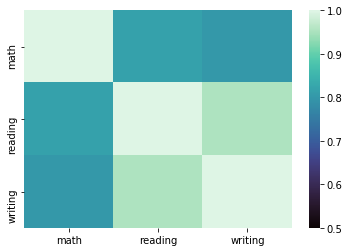

In [13]:
sns.heatmap(exams.corr(), cmap='mako', vmin=0.5)

In [14]:
exams.groupby('gender').describe().transpose()

gender             female        male
math    count  518.000000  482.000000
        mean    63.633205   68.728216
        std     15.491453   14.356277
        min      0.000000   27.000000
        25%     54.000000   59.000000
        50%     65.000000   69.000000
        75%     74.000000   79.000000
        max    100.000000  100.000000
reading count  518.000000  482.000000
        mean    72.608108   65.473029
        std     14.378245   13.931832
        min     17.000000   23.000000
        25%     63.250000   56.000000
        50%     73.000000   66.000000
        75%     83.000000   75.000000
        max    100.000000  100.000000
writing count  518.000000  482.000000
        mean    72.467181   63.311203
        std     14.844842   14.113832
        min     10.000000   15.000000
        25%     64.000000   53.000000
        50%     74.000000   64.000000
        75%     82.000000   73.750000
        max    100.000000  100.000000

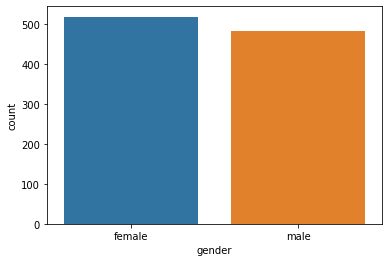

In [15]:
sns.countplot(x='gender', data=exams)

In [16]:
exams['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [17]:
exams.groupby('test_prep').count()

,gender,race,parental_education,lunch,math,reading,writing
test_prep,,,,,,,
completed,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642


In [18]:
exams.groupby('race').mean()

,math,reading,writing
race,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [19]:
exams.groupby('lunch').mean()

,math,reading,writing
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [20]:
exams.groupby('parental_education').mean()

,math,reading,writing
parental_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Text(0, 0.5, 'Reading score')

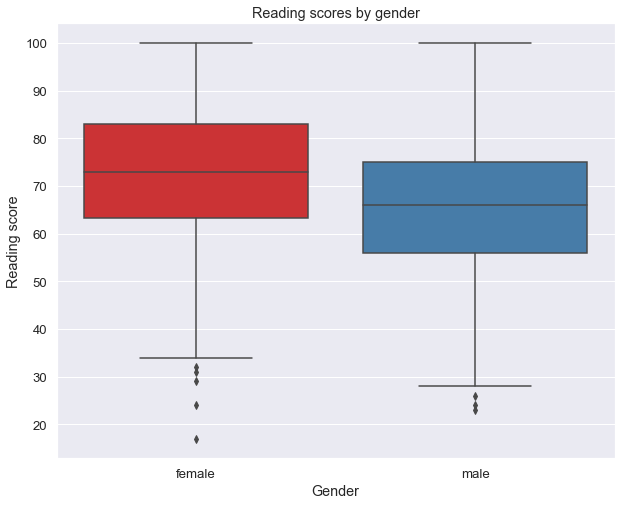

In [21]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set(font_scale=1.2)
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.set_yticks(range(0,110,10))
ax.set_title('Reading scores by gender')

sns.boxplot(x='gender', y='reading', data=exams, palette='Set1', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Reading score')

In [22]:
exams.groupby('gender')['reading'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


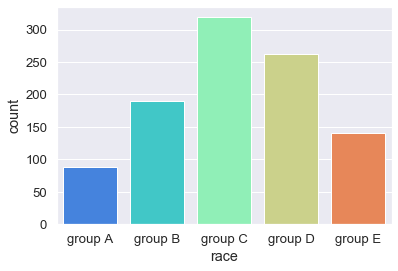

In [23]:
sns.countplot(x='race', data=exams, order=['group A', 'group B', 'group C', 'group D', 'group E'], palette='rainbow')

Text(0, 0.5, 'Math score')

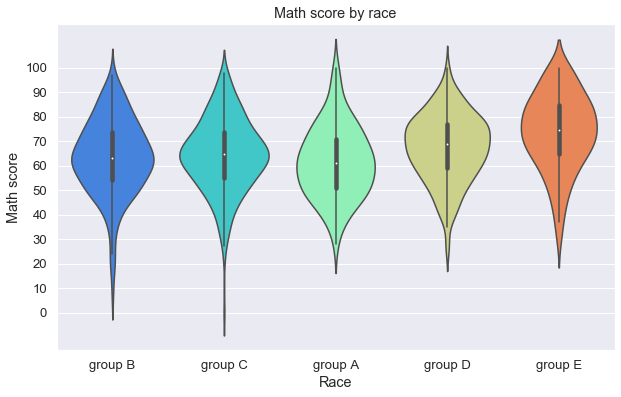

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.set_title('Math score by race')
ax.set_yticks(range(0,110,10))

sns.violinplot(x='race', y='math', data=exams, palette='rainbow')
#sns.swarmplot(x='race', y='math', data=exams, ax=ax, color='black', size=3, 
              #order=['group A', 'group B', 'group C', 'group D', 'group E'])
ax.set_xlabel('Race')
ax.set_ylabel('Math score')

In [25]:
exams.groupby('race')['math'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,61.629213,14.523008,28.0,51.00,61.0,71.0,100.0
group B,190.0,63.452632,15.468191,8.0,54.00,63.0,74.0,97.0
group C,319.0,64.463950,14.852666,0.0,55.00,65.0,74.0,98.0
group D,262.0,67.362595,13.769386,26.0,59.00,69.0,77.0,100.0
group E,140.0,73.821429,15.534259,30.0,64.75,74.5,85.0,100.0


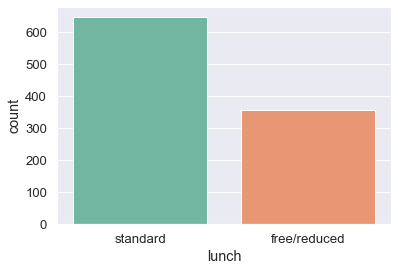

In [26]:
sns.countplot(x='lunch', data=exams, palette='Set2')

In [27]:
exams['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Text(0, 0.5, 'Writing score')

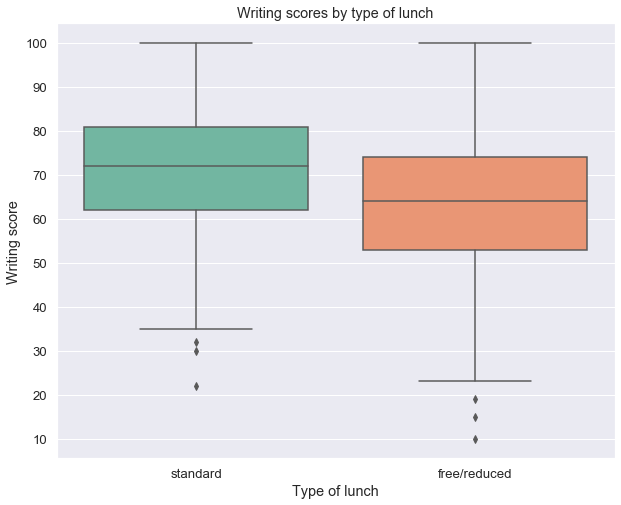

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.set_yticks(range(0,110,10))
ax.set_title('Writing scores by type of lunch')

sns.boxplot(x='lunch', y='writing', data=exams, palette='Set2', ax=ax)
ax.set_xlabel('Type of lunch')
ax.set_ylabel('Writing score')

In [29]:
exams.groupby('lunch')['writing'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,63.022535,15.433823,10.0,53.0,64.0,74.0,100.0
standard,645.0,70.823256,14.339487,22.0,62.0,72.0,81.0,100.0


## Building Models

In [30]:
exams.dtypes

gender                object
race                  object
parental_education    object
lunch                 object
test_prep             object
math                   int64
reading                int64
writing                int64
dtype: object

In [31]:
df1 = pd.get_dummies(exams, columns=['gender', 'race', 'parental_education', 'lunch', 'test_prep'], 
                    prefix = ['gender', 'race', 'pe', 'lunch', 'tp'],drop_first=True)

In [32]:
df1.head(1)

,math,reading,writing,gender_male,race_group B,race_group C,race_group D,race_group E,pe_bachelor's degree,pe_high school,pe_master's degree,pe_some college,pe_some high school,lunch_standard,tp_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1


In [33]:
X = df1.drop('gender_male', axis=1)
y = df1['gender_male']

In [34]:
import statsmodels.api as sm

logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Results: Logit
Model:                  Logit              Pseudo R-squared:   inf   
Dependent Variable:     gender_male        AIC:                inf   
Date:                   2020-12-05 16:11   BIC:                inf   
No. Observations:       1000               Log-Likelihood:     -inf  
Df Model:               13                 LL-Null:            0.0000
Df Residuals:           986                LLR p-value:        1.0000
Converged:              1.0000             Scale:              1.0000
No. Iterations:         8.0000                                       
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
math                  0.4653   0.0312  14.9286 0.0000  0.4042  0.5264
reading              

In [35]:
df2 = df1.drop(['reading', 'race_group B'], axis=1)
df2.head(1)
X = df2.drop('gender_male', axis=1)
y = df2['gender_male']

In [36]:
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Results: Logit
Model:                  Logit              Pseudo R-squared:   inf   
Dependent Variable:     gender_male        AIC:                inf   
Date:                   2020-12-05 16:11   BIC:                inf   
No. Observations:       1000               Log-Likelihood:     -inf  
Df Model:               11                 LL-Null:            0.0000
Df Residuals:           988                LLR p-value:        1.0000
Converged:              1.0000             Scale:              1.0000
No. Iterations:         8.0000                                       
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
math                  0.4675   0.0310  15.0589 0.0000  0.4067  0.5284
writing              

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop('gender_male',axis=1), 
                                                    df2['gender_male'], test_size=0.30, 
                                                    random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       160
           1       0.87      0.87      0.87       140

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[142  18]
 [ 18 122]]


In [43]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

0.12


In [44]:
y_pred = logmodel.predict(X_test)
print('Accuracy score of logistic regression classifier on the test set: {}'.format(logmodel.score(X_test, y_test)))

Accuracy score of logistic regression classifier on the test set: 0.88
